<a href="https://colab.research.google.com/github/Sunilkumar414674/CODSOFTtask1/blob/main/codsofttask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# Import the data set
import pandas as pd
import numpy as np

titanic = pd.read_csv('/content/codsofttask1.csv')
print(titanic.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [100]:
# to know the columns of titanic dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [102]:
# Data Preprocessing
# Fill missing values
print(titanic.isnull().sum())

# since age is numerical we are replacing with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# since Embarked is categorical we are replacing with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# we are drop columns as it does n't involved in model
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [103]:
titanic.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [113]:
 # Convert categorical variables into numeric
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [105]:
# to know data types and summary of titanic data
print(titanic.info())
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.0

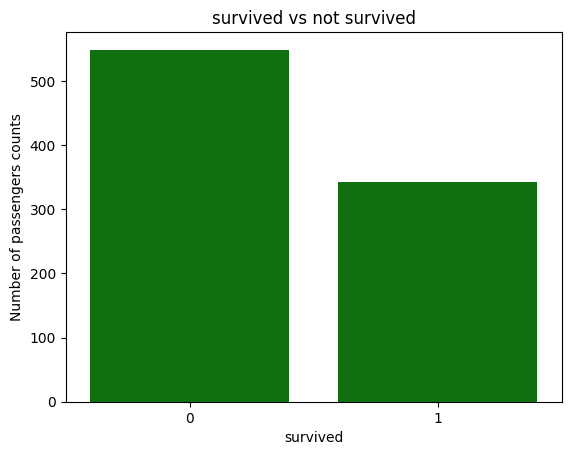

In [106]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of survived vs not survived
sns.countplot(x='Survived', data=titanic,color='green')
plt.title('survived vs not survived')
plt.xlabel('survived')
plt.ylabel('Number of passengers counts')
plt.show()


1.The right bar represents the passengers who survived the Titanic disaster. The height of this bar is approximately 350.

2.The left bar represents the passengers who did not survive. The height of this bar is approximately 550.

3.There were significantly more passengers who did not survive the disaster compared to those who did. This can be observed by the higher bar for 0 compared to 1.

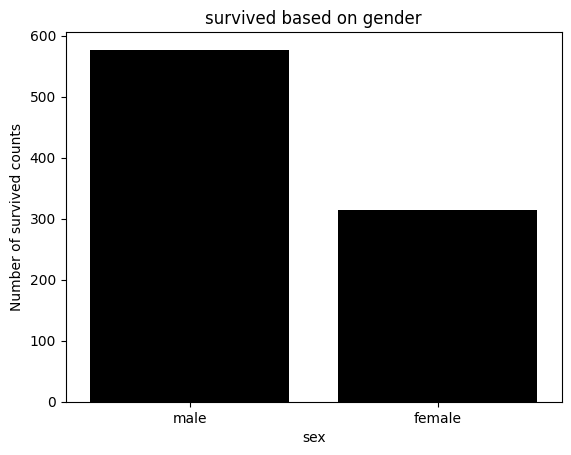

In [107]:
# Visualize the distribution of sex
sns.countplot(x='Sex', data=titanic,color='black')
plt.title('survived based on gender')
plt.xlabel('sex')
plt.ylabel('Number of survived counts')
plt.show()


1.The taller bar on the left indicates that around 550 male passengers survived.

2.The shorter bar on the right shows that about 350 female passengers survived.

3.More male passengers survived compared to female passengers.

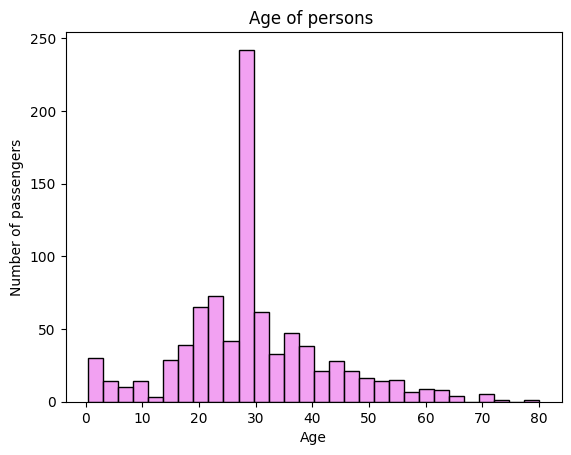

In [108]:
# to know the age distribution of passengers
sns.histplot(titanic['Age'].dropna(), kde=False, bins=30,color='violet')
plt.title('Age of persons ')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

1. Peak around 20-30 years: This indicates that many passengers were in their twenties or thirties.

2. Smaller peak around 0-5 years: Shows that there were a number of young children on board.

3. Long tail on the older side: there is a long tail extending toward older ages, it suggests that there were fewer older passengers but they were present.

In [135]:
# Prepare titanic training and test sets
from sklearn.model_selection import train_test_split

a= titanic.drop('Survived', axis=1)
b= titanic['Survived']
titanic_train, titanic_test, titanic1_train, titanic1_test = train_test_split(a,b, test_size=0.2, random_state=42)

# to Standardize the titanic features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_train = scaler.fit_transform(titanic_train)
titanic_train
titanic_test = scaler.transform(titanic_test)
titanic_test


array([[ 0.81303367, -0.09263364,  0.37992316, ...,  0.7243102 ,
        -0.30335547, -1.68779402],
       [-0.40055118,  0.13815631, -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 0.81303367, -0.7080735 , -0.47072241, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367,  0.67666619,  0.37992316, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-0.40055118, -0.93886345, -0.47072241, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [ 0.81303367, -1.93895323,  0.37992316, ..., -1.38062393,
        -0.30335547,  0.59248936]])

In [134]:
# To Build the model that predicts whether a passenger on the Titanic survived or not
from sklearn.ensemble import RandomForestClassifier
titanic_model = RandomForestClassifier(n_estimators=100, random_state=42)
titanic_model.fit(titanic_train, titanic1_train)

# Predict on the test set
titanic1_pred = titanic_model.predict(titanic_test)
titanic1_pred


array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [124]:
# to Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(titanic1_test, titanic1_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(titanic1_test, titanic1_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[91 14]
 [18 56]]


1.The model correctly predicts whether a passenger survived or not 82% of the time.With an accuracy of 82%, the model performs well in predicting the survival of passengers.

2.The model is particularly good at identifying passengers who did not survive, with high precision (83%) and recall (87%).

3.The model's performance is slightly lower for predicting survivors, with a precision of 80% and recall of 76%. This could be due to class imbalance or the inherent difficulty in identifying survivors correctly.

4.The F1-scores show that the model maintains a good balance between precision and recall for both classes, though slightly better for non-survivors.

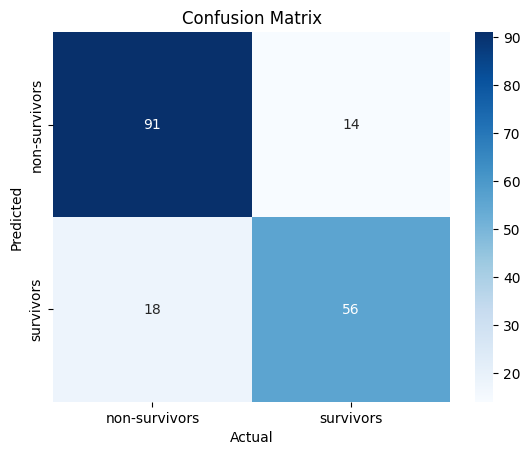

In [131]:
cm = confusion_matrix(titanic1_test,titanic1_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non-survivors','survivors'], yticklabels=['non-survivors','survivors'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

1.True Negative Rate: The model performs very well in identifying passengers who did not survive, with a high true negative rate (91 correctly predicted non-survivors).

2.False Positives: There are 14 instances where the model incorrectly predicted that a passenger survived when they did not. This indicates that the model has some false alarms.

3.False Negatives: There are 18 instances where the model incorrectly predicted that a passenger did not survive when they actually did. This indicates that the model misses some true survivors.

4.True Positives: The model correctly identifies 56 survivors.